In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as sts 
from statistics import stdev
print("All set!")

All set!


In [2]:
with open('/Users/bijayamanandhar/Desktop/data/us_counties_covid19_daily.csv', 'r') as csv_file:
    n = 15000
    data = pd.read_csv(csv_file, skiprows = lambda i: i % n != 0)
data.describe()

,fips,cases,deaths
count,35.000000,35.000000,35.000000
mean,31102.285714,419.685714,17.685714
std,13371.133864,924.561288,50.899423
min,6089.000000,1.000000,0.000000
25%,19598.000000,16.500000,0.000000
50%,31131.000000,44.000000,2.000000
75%,39620.000000,365.000000,8.000000
max,54003.000000,4780.000000,262.000000


### convert data to numpy array, then to python list

In [4]:
n = data.to_numpy()
nd = n.tolist()


In [5]:
state_cases = dict()
state_deaths = dict()
country_data = dict()
country_cases = 0
country_deaths = 0

for row in nd:
    
    if row[2] not in state_cases:
        state_cases[row[2]] = row[4]
    else:
        state_cases[row[2]] += row[4]

    if row[2] not in state_deaths:
        state_deaths[row[2]] = row[5]
    else:
        state_deaths[row[2]] += row[5]
   
cases = sum(state_cases.values())
deaths = sum(state_deaths.values())
case_list = list(state_cases.values())
country_data['cases'] = sum(state_cases.values())
country_data['death'] = sum(state_deaths.values())
country_data['mean'] = round(np.mean(case_list))
country_data['median'] = np.median(case_list)

pd.DataFrame(list(country_data.items()))

,0,1
0,cases,14689.0
1,death,619.0
2,mean,612.0
3,median,80.0


### State way summary

In [6]:
x = input('Enter state name: ')
data.loc[data.state == x, ['cases', 'deaths']].sum()

Enter state name: California


cases     612
deaths     12
dtype: int64

### Bar graph

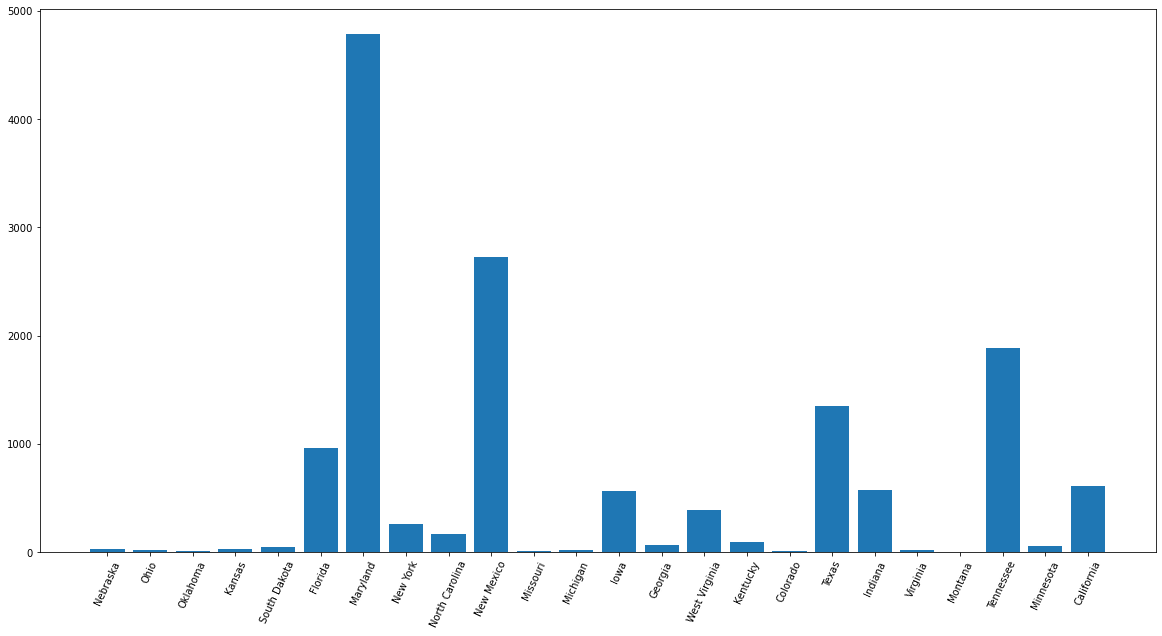

In [7]:
plt.figure(figsize=(20, 10))
x = list(state_cases.keys())
y = list(state_cases.values())
plt.bar(x, y)
plt.xticks(x, x, rotation=65)
plt.show()

In [8]:
pd.DataFrame(list(country_data.items())).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4 non-null      object 
 1   1       4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [9]:
pd.DataFrame(list(country_data.items())).dtypes

0     object
1    float64
dtype: object

In [10]:
type(pd.DataFrame(list(country_data.items())))

pandas.core.frame.DataFrame

In [11]:
data.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

In [12]:
data['date'].shape

(35,)

In [13]:
data['state'].shape

(35,)

In [14]:
data.shape

(35, 6)

In [15]:
data["date"] = pd.to_datetime(data["date"])

In [16]:
data.mean(axis=0)

<ipython-input-16-02762784858d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean(axis=0)


fips      31102.285714
cases       419.685714
deaths       17.685714
dtype: float64

In [17]:
data.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [18]:
get_ipython().run_cell_magic('HTML', '', '<style type="text/css">\ntable.dataframe td, table.dataframe th {\n    border: 1px  black solid !important;\n  color: black !important;\n}\n</style>')

In [19]:
data.state.describe()

count          35
unique         24
top       Indiana
freq            3
Name: state, dtype: object

In [20]:
data.cases.mean()

419.6857142857143

In [21]:
data.deaths.mean()

17.685714285714287

In [22]:
get_ipython().run_line_magic('matplotlib', 'inline')

<AxesSubplot:xlabel='state'>

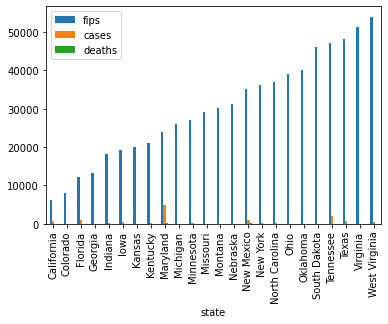

In [23]:
data.groupby('state').mean().plot(kind='bar')
#<matplotlib.axes._subplots.AxesSubplot at 0x7fd200da02b0>

In [24]:
pd.crosstab(data.state, data.date)

date,2020-03-27,2020-04-03,2020-04-09,2020-04-15,2020-04-20,2020-04-26,2020-05-01,2020-05-06,2020-05-11,2020-05-16,...,2020-08-01,2020-08-05,2020-08-10,2020-08-15,2020-08-19,2020-08-24,2020-08-29,2020-09-02,2020-09-07,2020-09-12
state,,,,,,,,,,,,,,,,,,,,,
California,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Colorado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Florida,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Georgia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Indiana,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Iowa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kansas,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kentucky,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Maryland,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data.drop(3, axis=0).head() 
#drops the data row at index 3, axis-0 means across rows (top-down)

,date,county,state,fips,cases,deaths
0,2020-03-27,Cass,Nebraska,31025.0,2,0
1,2020-04-03,Tuscarawas,Ohio,39157.0,17,0
2,2020-04-09,Logan,Oklahoma,40083.0,7,0
4,2020-04-20,Aurora,South Dakota,46003.0,1,0
5,2020-04-26,Lee,Florida,12071.0,960,37


In [26]:
data.isnull().sum() 
#shows total number of missing data, True=1, False=0 

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [27]:
data.drop('fips', axis=1).head(5)
#drops column 'fips', axis=1, means across column (left-right)

,date,county,state,cases,deaths
0,2020-03-27,Cass,Nebraska,2,0
1,2020-04-03,Tuscarawas,Ohio,17,0
2,2020-04-09,Logan,Oklahoma,7,0
3,2020-04-15,Ford,Kansas,32,0
4,2020-04-20,Aurora,South Dakota,1,0


In [28]:
#Standard Deviatiion
standard_deviation = stdev(list(data.cases))
standard_deviation

924.5612877413351

In [29]:
max(data.cases) #max number in cases clomun

4780

In [30]:
min(data.cases)#min number in cases column

1

In [31]:
max(data.deaths)

262

In [32]:
np.std(data.cases)

911.257554040524

In [33]:
data[data.state == 'California'].mean() 
#gives totals of numerical columns for a specified state

<ipython-input-33-cddcffd0b0f9>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data[data.state == 'California'].mean()


fips      6089.0
cases      612.0
deaths      12.0
dtype: float64

In [34]:
data[['cases', 'deaths']].sum() #total for each specified columns
#It's a pandas.core.series.Series


cases     14689
deaths      619
dtype: int64

In [36]:
data

,date,county,state,fips,cases,deaths
0,2020-03-27,Cass,Nebraska,31025.0,2,0
1,2020-04-03,Tuscarawas,Ohio,39157.0,17,0
2,2020-04-09,Logan,Oklahoma,40083.0,7,0
3,2020-04-15,Ford,Kansas,20057.0,32,0
4,2020-04-20,Aurora,South Dakota,46003.0,1,0
5,2020-04-26,Lee,Florida,12071.0,960,37
6,2020-05-01,Montgomery,Maryland,24031.0,4780,262
7,2020-05-06,Chautauqua,New York,36013.0,38,2
8,2020-05-11,Clay,North Carolina,37043.0,5,0
9,2020-05-16,Edgecombe,North Carolina,37065.0,167,7


In [37]:
data['cases'].sum() #total for a specified column
#It's numpy.int64

14689

In [38]:
data = pd.read_csv('/Users/bijayamanandhar/Desktop/data/us_counties_covid19_daily.csv').head(2000)
states = list(set(data.state)) #list of states

In [39]:
#State summary
state_dict = {}
for each_state in states:
    each_state_data = data.loc[data.state == each_state, ['cases', 'deaths']].sum()
    state_dict[each_state] = each_state_data
result = pd.DataFrame(state_dict).T
result

,cases,deaths
Oregon,140,0
Kansas,16,2
New Hampshire,44,0
New Mexico,20,0
Alabama,18,0
Montana,4,0
Indiana,49,0
Rhode Island,57,0
Virginia,73,0
Vermont,10,0


In [40]:
result.index

Index(['Oregon', 'Kansas', 'New Hampshire', 'New Mexico', 'Alabama', 'Montana',
       'Indiana', 'Rhode Island', 'Virginia', 'Vermont', 'California',
       'Tennessee', 'Ohio', 'Puerto Rico', 'Maryland', 'Alaska',
       'North Carolina', 'Colorado', 'Massachusetts', 'Pennsylvania',
       'Missouri', 'Hawaii', 'Georgia', 'Oklahoma', 'Wyoming', 'Mississippi',
       'Maine', 'North Dakota', 'Arkansas', 'Florida', 'District of Columbia',
       'Iowa', 'Arizona', 'Washington', 'Texas', 'Utah', 'New York', 'Nevada',
       'Idaho', 'Wisconsin', 'New Jersey', 'Minnesota', 'Illinois', 'Nebraska',
       'South Carolina', 'Delaware', 'Louisiana', 'Michigan', 'Connecticut',
       'South Dakota', 'Kentucky'],
      dtype='object')